<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

# Day-05 常見的陣列方法與函式

* NumPy 最主要提供陣列的資料結構，我們會把定義在陣列上可用的方法稱為是通用函式(universal function，ufunc)。ufunc 與一般的函式的差別在於，他是一種特別適合用於陣列元素級別的操作(以整組為單位的元素運算)。也就是說，ufunc 滿足矩陣運算的特性，例如廣播、對齊這樣的特性。所以，我們也會稱 ufunc 是一種用於向量化(vectorized)運算的封裝函式

## 匯入套件

In [ ]:
import numpy as np
print(np.__version__) # 1.19.2

1.22.4


### 陣列中的統計方法

In [ ]:
a = np.arange(6)
print(a)

print(a.sum()) 
print(a.min()) 
print(a.max()) 

[0 1 2 3 4 5]
15
0
5


#### 總和：`sum()`
* 有三種層級的函式都可得到相同的結果

In [ ]:
# 一種功能，三種函式
a = np.arange(6)

print(a.sum()) 
print(np.sum(a))
print(sum(a)) 

15
15
15


* 陣列中的軸參數

In [ ]:
b = np.arange(12).reshape(3, 4)
print(b)
print('='*20)
print(b.sum())
print(b.sum(axis=0))
print(b.sum(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
66
[12 15 18 21]
[ 6 22 38]


* 搜尋與排序方法

In [ ]:
a = np.array([1, 3, 2, 5, 4])
print(a.sort())
print(a)

None
[1 2 3 4 5]


In [ ]:
a = np.array([1, 3, 2, 5, 4])
print(np.sort(a))
print(a)

[1 2 3 4 5]
[1 3 2 5 4]


In [ ]:
print(np.searchsorted([1,2,3,4,5], 3))
print(np.searchsorted(
    [1, 2, 3, 4, 5],
    [-10, 10, 3, 5]
))

2
[0 5 2 4]


關於 `numpy.sort(...)` 參數比較細節的用法：

```
numpy.sort(a, axis=-1, kind=None, …)
```

* a：必填，任何需要被排序的 array_like 物件
* axis：預設 = -1，指的是排序的方向
* kind：有四種排序算法可以選（quicksort, mergesort, heapsort, stable），預設為 quicksort 演算法

補充：更多細節用法，請參考 [官方文件](https://numpy.org/devdocs/reference/generated/numpy.sort.html#numpy.sort)

關於 `ndarray.sort(...)` 參數比較細節的用法：

```
ndarray.sort(axis=-1, kind=None, …)
```

* axis：預設 = -1，指的是排序的方向
* kind：有四種排序算法可以選（quicksort, mergesort, heapsort, stable），預設為 quicksort 演算法

補充：更多細節用法，請參考 [官方文件](https://numpy.org/devdocs/reference/generated/numpy.ndarray.sort.html#numpy.ndarray.sort)

* 補充：排序演算法
  * 不管是 np.sort(a) 或是 a.sort() 的排序方法，都有一個參數叫 kind，可以用來指定排序算法，可以從選 quicksort, mergesort, heapsort, stable 選擇一種 (預設為 quicksort 演算法)
  
| kind | speed | worst case | work space | stable |
|------|:-----:|:----------:|:----------:|:------:|
| 'quicksort'(預設) | 1 | O(n^2) | 0 | no |
| 'heapsort' | 3 | O(n* log(n)) | 0 | no |
| 'mergesort' | 2 | O(n* log(n)) | ~n/2 | yes |
| 'timesort' | 2 | O(n* log(n)) | ~n/2 | yes |
  

* 搜尋的話可以使用 searchsorted() 的函式

In [ ]:
np.searchsorted([1,2,3,4,5], 3)

2

In [ ]:
np.searchsorted(
    [1, 2, 3, 4, 5],
    [-10, 10, 3, 5]
)

array([0, 5, 2, 4], dtype=int64)

* reshape 和 resize
  * 透過 flatten() 與 ravel() 均可將多維陣列轉形為一維陣列，flatten() 與 ravel() 的使用透過下列兩種方法，得到的結果都是完全一樣的
  * 不同的是：
    * ravel() 
      * 建立的是原來陣列的 view，所以在 ravel() 回傳物件中做的元素值變更，將會影響原陣列的元素值
    * reshape()
      * 呼叫 reshape() 時指定新的形狀 (shape)，可將陣列重塑為該形狀，但如果新的總數與原先 shape 總數不一致的話，則會產生錯誤
      * Reshape 時，新的形狀可以採用模糊指定為 -1，讓 NumPy 自動計算，例如：a.reshape((5, -1))
      * 若 reshape 後的陣列元素值改變，會影響原陣列對應的元素值也跟著改變
    * resize()
      * 與 reshape() 不同的地方在於，如果 resize 的大小超過總元素值，則會在後面的元素值的指定為 0
      * 如果 resize 的大小小於總元素值，則會依照 C-style 的順序，取得 resize 後的陣列元素

In [ ]:
a = np.arange(6)

print(a)
print(a.reshape(3, 2))
print(a)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]


In [ ]:
a = np.arange(6)

print(a)
print(a.resize((3, 2)))
print(a)

[0 1 2 3 4 5]
None
[[0 1]
 [2 3]
 [4 5]]


In [ ]:
# 三種陣列攤平用法
a = np.arange(6).reshape((3, 2))

print(a.ravel() )
print(a.flatten())
print(a.flat)
print(list(a.flat))

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0, 1, 2, 3, 4, 5]


* `where()`
  * 傳入條件式，回傳值為符合條件的元素索引
  * 若是多維陣列的話，會回傳多個陣列的索引值，要合在一起看。以二維陣列為例
  ```
  (array([0,0,1,2]), 
   array([0,1,3,2]))
  ```
  * 上面的回傳值代表 a[0,0], a[0,1], a[1,3], a[2,2] 均為符合條件的元素索引值
  * 參考文件：[文件說明](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [ ]:
a = np.arange(10)
print(a)
print('='*20)
print(np.where(a < 5, a, 10*a))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4 50 60 70 80 90]


* `nonzero()`
  * nonzero 等同於 np.where(array!=0) 的語法，同樣的也是回傳符合非0條件的元素所引值
  * 有 2 種不同的使用方式：
  
|np.函式|陣列物件.函式|
|-------|:----------:|
|numpy.nonzero(array)|ndarray.nonzero()|
  

* `sort()`與`argsort()`
  * 對陣列進行排序可以使用 sort() 與 argsort()，兩者的差異：
    * sort() 回傳的是排序後的陣列
    * argsort() 回傳的是排序後的陣列索引值
  * 有 2 種不同的使用方式：
  
|np.函式|陣列物件.函式|
|-------|:----------:|
|numpy.sort(a, axis=-1, kind=None, order=None)|ndarray.sort()|
|numpy.argsort(a, axis=-1, kind=None, order=None)|ndarray.argsort()|

  <br>
  
  * 與 np.sort() 不同的是，陣列物件.sort() 的語法會進行 in-place 排序，也就是原本的陣列內容會跟著改變
  * 多維陣列在排序時可以指定要依據的軸

## 常用[統計函式](https://numpy.org/doc/stable/reference/routines.statistics.html)

### 順序統計量 (Order Statistics)

#### 最大值和最小值

* 在先前的單元中曾介紹過找出陣列中的最大值 ( `ndarray.max()`、`np.amax()` ) 和最小值 ( `ndarray.min()`、`np.amin()` )，針對單一陣列中取得最大值或最小值。

* 在 NumPy 順序統計量的相關函式中，最大值與最小值相關的函式還有：
  - `numpy.maximum()`、`numpy.minimum()`
  - `numpy.fmax()`、`numpy.fmin()`
  - `numpy.nanmax()`、`numpy.nanmin()`

In [ ]:
np.random.seed(1)
a = np.random.randint(1, 10, 6).reshape(2, 3)
b = np.random.randint(1, 5, 3)

In [ ]:
a

array([[6, 9, 6],
       [1, 1, 2]])

In [ ]:
b

array([1, 4, 2])

##### `numpy.maximum()`, `numpy.minimum()`

* 以 element-wise 比較 2 個陣列並回傳各元素的最大值或最小值。如果比較的元素中的 nan 的話，則會回傳 nan。
* `maximum()` 與 `minimum()` 在進行比較時，若有需要會利用到廣播 (bradcasting)

In [ ]:
np.maximum(a, b)

array([[6, 9, 6],
       [1, 4, 2]])

In [ ]:
np.minimum(a, b)

array([[1, 4, 2],
       [1, 1, 2]])

In [ ]:
np.maximum(a, [np.nan, 0, np.nan])

array([[nan,  9., nan],
       [nan,  1., nan]])

##### `numpy.fmax()`, `numpy.fmin()`

* 以 element-wise 比較 2 個陣列並回傳各元素的最大值或最小值。與 `maximum()` / `minimum()` 不同的是，如果比較的元素中只有一個是 nan 的話，回傳非 nan 的值，如果兩個元素都是 nan 則回傳 nan
* 同樣在進行比較時，若有需要會利用到廣播 (bradcasting)

In [ ]:
np.fmax(a, b)

array([[6, 9, 6],
       [1, 4, 2]])

In [ ]:
np.fmin([np.nan, 3, np.nan], [np.nan, np.nan, np.nan])

array([nan,  3., nan])

##### `numpy.nanmax()`, `numpy.nanmin()`

* 回傳陣列中有非 nan 元素值的最大值或最小值
* 可以指定要比較的軸(axis)，以及回傳值是否要保留維度。常用語法如下：

```python
numpy.nanmax(a, axis=None, keepdims=<no value>)
numpy.nanmin(a, axis=None, keepdims=<no value>)
```

In [ ]:
np.nanmax([1, 2, np.nan, 3])

3.0

如果元素中都是 nan 值則會產生 RuntimeWarning。

In [ ]:
np.nanmax([np.nan, np.nan])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN axis encountered
  """Entry point for launching an IPython kernel.


nan

##### `argmax()`, `argmin()`：陣列搜尋與排序
* `argmax()` / `argmin()` 和上述不同的地方在於，`argmax()` / `argmin()` 回傳的是最大值和最小值的索引，也可以依照軸找出各軸最大值和最小值的索引
* 有 2 種不同的使用方式：

|np.函式|陣列物件函式|
|-------|:---------:|
|numpy.argmax(array, axis=None)|ndarray.argmax(axis=None)|
|numpy.argmin(array, axis=None)|ndarray.argmin(axis=None)|


#### 百分位數：`percentile()`, `nanpercentile()`

* 計算百分位數，`percentile()` 與 `nanpercentile()` 不同的地方在於後者會忽略 nan
* 欲取得的百分位數引數，可以傳入純量或是陣列的值 (介於0 - 100 之間)，也可以指定要比較的軸，以及回傳值是否要保留維度。常用語法如下：

```python
numpy.percentile(a, q, axis=None, keepdims=<no value>)
numpy.nanpercentile(a, q, axis=None, keepdims=<no value>)
```

In [ ]:
p = np.arange(1, 20).astype('float32')
p

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.], dtype=float32)

In [ ]:
np.percentile(p, [30, 60])

array([ 6.4, 11.8])

In [ ]:
p[5] = np.nan
p[9] = np.nan
p[15] = np.nan

In [ ]:
p

array([ 1.,  2.,  3.,  4.,  5., nan,  7.,  8.,  9., nan, 11., 12., 13.,
       14., 15., nan, 17., 18., 19.], dtype=float32)

In [ ]:
np.nanpercentile(p, 50)

10.0

如果元素中包含 nan 的話，則 `percentile()` 會回傳 nan。

In [ ]:
np.percentile(p, 50)

nan

#### 分位數：`quantile()`, `nanquantile()`

* 計算分位數，`quantile()` 與 `nanquantile()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `quantile()` 會回傳 nan
* 欲取得的分位數引數，可以傳入純量或是陣列的值 (介於0 - 1 之間)，也可以指定要比較的軸，以及回傳值是否要保留維度。常用語法如下：

```python
numpy.quantile(a, q, axis=None, keepdims=<no value>)
numpy.nanquantile(a, q, axis=None, keepdims=<no value>)
```

In [ ]:
q = np.array([23,  2,  1, 18,  9, 25, 14, 48, 43,  9, 31,  8,  4,  7, 22,  4,  5, 25, 44, 13])
q

array([23,  2,  1, 18,  9, 25, 14, 48, 43,  9, 31,  8,  4,  7, 22,  4,  5,
       25, 44, 13])

In [ ]:
np.quantile(q, 0.25)

6.5

In [ ]:
q = np.array([23,  2,  1, np.nan,  9, 25, np.nan, 48, 43,  9, 31,  np.nan,  4,  7, np.nan,  4,  5, 25, 44, 13]).reshape(5, 4)
q

array([[23.,  2.,  1., nan],
       [ 9., 25., nan, 48.],
       [43.,  9., 31., nan],
       [ 4.,  7., nan,  4.],
       [ 5., 25., 44., 13.]])

下例是沿 axis 0 計算分位數，並且保留二維的維度。

In [ ]:
np.nanquantile(q, 0.25, axis=0, keepdims=True)

array([[ 5. ,  7. , 16. ,  8.5]])

### 平均數與變異數

#### 平均值：`mean()`, `nanmean()`

* `mean()` 和 `nanmean()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `mean()` 會回傳 nan。下面的例子使用 `np.isnan()` 判斷陣列中是否包含 nan，如果無 nan 的話就呼叫 `mean()` 計算平均值，反之則呼叫 `nanmean()` 進行計算
* 可以指定要計算平均數的軸，以及回傳值是否要保留維度。`dtype` 引數是計算使用的型別，若輸入陣列是整數的話，則會用 `float64` 型別計算，若輸入的是浮點數的話，則是依輸入陣列的型別做為 `dtype`
* 常用語法如下：

```python
numpy.mean(a, axis=None, dtype=None, keepdims=<no value>)
numpy.nanmean(a, axis=None, dtype=None, keepdims=<no value>)
```

In [ ]:
a = np.array([23,  2,  1, np.nan,  9, 25, np.nan, 
              48, 43,  9, 31,  np.nan]).reshape(3, 4)

In [ ]:
np.mean(a)

nan

In [ ]:
if not np.isnan(np.sum(a)):
    print('陣列中無 nan，忽略 nan 後的平均值為：', np.mean(a))
else:
    print('陣列中有 nan，忽略 nan 後的平均值為：', np.nanmean(a))

陣列中有 nan，忽略 nan 後的平均值為： 21.22222222222222


#### 平均值：`average()`

* 使用 `average()` 計算平均值的話，可以輸入權重值做為引數
* 須注意權重的總和不能為 0，否則會產生錯誤
* 常用語法：

```python
numpy.average(a, axis=None, weights=None)
```

In [ ]:
a = np.arange(6).reshape((3,2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

* 權重平均值的計算公式為：須注意權重的總和不能為 0，否則會產生錯誤。

> avg = sum(a * weights) / sum(weights)

In [ ]:
np.average(a, axis=1, weights=[0.25, 0.75])

array([0.75, 2.75, 4.75])

In [ ]:
np.average(a, axis=1, weights=[0, 0])

ZeroDivisionError: Weights sum to zero, can't be normalized

#### 計算中位數：`median()`, `nanmedian()`

* `median()` 和 `nanmedian()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `median()` 會回傳 nan
* 可以指定要計算中位數的軸，以及回傳值是否要保留維度。要留意的是，如果軸或是陣列總數不是單數的話，中位數的值會是中間 2 個元素值相加除以 2
* 常用語法如下：

```python
numpy.median(a, axis=None, keepdims=False)
numpy.nanmedian(a, axis=None, keepdims=False)
```

In [ ]:
np.random.seed(5)
m = np.random.randint(1, 50, 15).reshape(3, 5)
m

array([[36, 15, 48, 39, 17],
       [10,  9, 37, 40, 28],
       [49, 31, 17,  8, 13]])

In [ ]:
np.median(m, axis=1)

array([36., 28., 17.])

In [ ]:
np.nanmedian(np.array([[36, 15, np.nan, 39, 17],
                       [np.nan,  9, 37, np.nan, 28],
                       [49, np.nan, 17,  8, 13]]), axis=1)

array([26.5, 28. , 15. ])

#### 計算標準差：`std()`, `nanstd()`

* `std()` 和 `nanstd()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `std()` 會回傳 nan
* 可以指定要計算標準差的軸，以及回傳值是否要保留維度。若是對於精度可能造成的誤差影響，可以改變 `dtype` 提高精度
* 如果要計算樣本標準差的話，可將 `ddof` (自由度) 引數傳入 1，在計算平均方差 (mean squared deviation) 時分母就會以 N - ddof 做計算
* 常用語法如下：

```python
numpy.std(a, axis=None, dtype=None, ddof=0, keepdims=<no value>)
numpy.nanstd(a, axis=None, dtype=None, ddof=0, keepdims=<no value>)
```

In [ ]:
s = np.array([[1, 2], [3, 4]])
np.std(s)

1.118033988749895

#### 計算變異數：`var()`, `nanvar()`

* `var()` 和 `nanvar()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `var()` 會回傳 nan
* 可以指定要計算變異數的軸，以及回傳值是否要保留維度。若是對於精度可能造成的誤差影響，可以改變 `dtype` 提高精度
* 如果要計算樣本變異數的話，可將 `ddof` (自由度) 引數傳入 1，在計算平均方差 (mean squared deviation) 時分母就會以 N - ddof 做計算
* 常用語法如下：

```python
numpy.var(a, axis=None, dtype=None, ddof=0, keepdims=<no value>)
numpy.nanvar(a, axis=None, dtype=None, ddof=0, keepdims=<no value>
```

In [ ]:
v = np.array([[1, 2], [3, 4]])
np.var(a)

2.9166666666666665

In [ ]:
np.var(a, axis=0)

array([2.66666667, 2.66666667])

In [ ]:
np.var(a, axis=1)

array([0.25, 0.25, 0.25])

### 相關性

#### 相關係數：`corrcoef()`

* `corrcoef()` 計算 Pearson 積差相關係數。引數 `rowvar` 預設值為 `True`，代表將每一個 row 當做是一筆變數
* 語法如下：

```python
numpy.corrcoef(x, y=None, rowvar=True)
```

In [ ]:
x = np.random.randint(1, 20, 10).reshape(2, 5)

In [ ]:
np.corrcoef(x)

array([[1.        , 0.64936333],
       [0.64936333, 1.        ]])

#### 互相關 (Cross-correlation)：`correlate()`

* 計算 2 個一維序列的互相關。`mode` 引數及回傳序列形狀如下表：

|mode|回傳序列形狀|
|---|---|
|valid|max(M, N)|
|full|(N+M-1,)|
|same|max(M, N) - min(M, N) + 1|

* _N 為第1個序列的元素數，M為第2個序列的元素數
* `correlate()` 語法如下：

```python
numpy.correlate(a, v, mode='valid')
```

In [ ]:
np.correlate([1, 2, 3], [0, 1])

array([2, 3])

#### 共變異數：`cov()`

* 引數說明如下：

|引數|說明|
|---|---|
|m|一維或二維陣列|
|y|額外資料，形狀須與m相同|
|rowvar|每一個 row 當做是一筆變數，預設值為 True|
|bias|樣本共變異數的話設為 False (預設值)，母體設為 True|
|ddof|自由度，預設值為 None|
|fweights|頻率加權，預設值為 None|
|aweights|觀測向量加權，預設值為 None|

* 語法如下：

```python
numpy.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)
```

In [ ]:
x = np.array([[0, 1, 2],
              [2, 1, 0]])

np.cov(x)

array([[ 1., -1.],
       [-1.,  1.]])

### 直方圖 (Histogram)

* NumPy 提供 `np.histogram()` 函式來計算 histogram，基本語法如下：

```python
numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
```

|引數|說明|
|---|---|
|a|輸入陣列|
|bins|bins的定義，可傳入純量、序列、或是不同的方法 (例如：auto)|
|range|bins的範圍，預設是 a.min() 與 a.max() 之間，或是依照傳入的範圍|
|weights|權重值，陣列形狀須與a相同|
|density|False：回傳各bin的count<br />True：回傳各bins的probability density|


下面的例子是隨機產生包含 100 個 0 - 9 數字的二維陣列，計算 histogram。

In [ ]:
a = np.random.randint(0, 10, 100).reshape(10, 10)
a

array([[9, 9, 9, 9, 1, 2, 7, 0, 5, 0],
       [0, 4, 4, 9, 3, 2, 4, 6, 9, 3],
       [3, 2, 1, 5, 7, 4, 3, 1, 7, 3],
       [1, 9, 5, 7, 0, 9, 6, 0, 5, 2],
       [8, 6, 8, 0, 5, 2, 0, 7, 7, 6],
       [0, 0, 8, 5, 5, 9, 6, 4, 5, 2],
       [8, 8, 1, 6, 3, 4, 1, 8, 0, 2],
       [2, 4, 1, 6, 3, 4, 3, 1, 4, 2],
       [3, 4, 9, 4, 0, 6, 6, 9, 2, 9],
       [3, 0, 8, 8, 9, 7, 4, 8, 6, 8]])

In [ ]:
hist, bin_edges = np.histogram(a, bins=9)
hist, bin_edges

(array([1, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]))

* 比較 `histogram()` 的結果與實際元素值的 count，下面的範例使用 `np.unique()` 來得到所有出現過的值與其 count (出現的次數)

In [ ]:
unique, counts = np.unique(a, return_counts=True)

In [ ]:
unique, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([12,  8, 10, 10, 12,  8, 10,  7, 10, 13]))

* 若使用資料視覺化進行比較並觀察其分佈，可以產出下面的圖表，其結果與上面使用 `np.histogram()` 產生的數值是完全相同的

* 有關於 Matplotlib 的功能，會在後續資料視覺化的單元進行詳細介紹

(array([12.,  8., 10., 10., 12.,  8., 10.,  7., 23.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 9 Patch objects>)

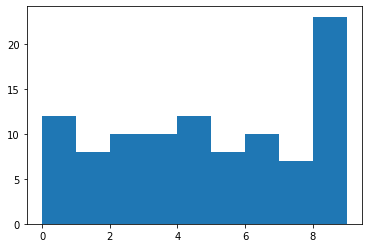

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(a.reshape(-1), bins=9)

### 陣列中的軸參數

* 對多維的陣列進行操作，可設定軸(Axis)的參數

In [ ]:
b = np.arange(12).reshape(3, 4)
print(b)
print(b.sum())
print(b.sum(axis=0))
print(b.sum(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
66
[12 15 18 21]
[ 6 22 38]


### `digitize()`

* `digitize()` 是用來將連續數值離散化的函式，傳入陣列及 bins (必須為一維陣列)，得到輸入陣的各元素值是屬於哪一個 bins，並回傳對應的 bin 索引
* 語法如下：

```python
numpy.digitize(x, bins, right=False)
```

其中引數 `right` 的傳入值影響到是否包含 bin 的左或右邊界，符合下列條件則 x 屬於 $i^{th}$ bin：

|bins元素排序|引數值|說明|
|---|---|---|
|漸增|right=False|包含左邊界但不包含右邊界<br />bins[i-1] <= x < bins[i]|
|漸增|right=True|不包含左邊界但包含右邊界<br />bins[i-1] < x <= bins[i]|
|漸減|right=False|包含左邊界但不包含右邊界<br />bins[i-1] > x >= bins[i]|
|漸減|right=True|不包含左邊界但包含右邊界<br />bins[i-1] >= x > bins[i]|

In [ ]:
x = np.array([0.5, 6.2, 3.0, 1.7])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])

In [ ]:
inds = np.digitize(x, bins)
inds

array([1, 4, 3, 2])

## 搜尋與排序方法

### 排序

#### `sort()`

* `np.sort(...)`用法：原本的陣列內容會跟著改變
  ```
  numpy.sort(a, axis=-1, kind=None, …)
  ```
  
  * 其中
    * a：必填，任何需要被排序的 array_like 物件
    * axis：預設 = -1，指的是排序的方向
    * kind：有四種排序算法可以選（quicksort, mergesort, heapsort, stable），預設為 quicksort 演算法

* `ndarray.sort(...)`用法：陣列物件.sort() 的語法會進行 in-place 排序
  ```
  ndarray.sort(axis=-1, kind=None, …)
  ```

  * 其中
    * axis：預設 = -1，指的是排序的方向
    * kind：有四種排序算法可以選（quicksort, mergesort, heapsort, stable），預設為 quicksort 演算法
    
* 多維陣列在排序時可以指定要依據的軸
* 以排序來說有兩種實現方法

In [ ]:
a = np.array([1, 3, 2, 5, 4])
print(a)
print(a.sort())
print(a)

[1 3 2 5 4]
None
[1 2 3 4 5]


In [ ]:
a = np.array([1, 3, 2, 5, 4])
print(a)
print(np.sort(a))
print(a)

[1 3 2 5 4]
[1 2 3 4 5]
[1 3 2 5 4]


* 排序演算法

|kind|speed|worst case|work space|stable|
|-----|:-----|:-----|:-----|:-----|
|quicksort(預設)|1|O(n^2)|0|no|
|heapsort|3|O(n*log(n))|0|no|
|mergesort|2|O(n*log(n))|~n/2|yes|
|timesort|2|O(n*log(n))|~n/2|yes|


#### `sort()` 和 `argsort()`

* 要對陣列進行排序可使用 `sort()` 與 `argsort()`
* 差異在於 `sort()` 回傳的是排序後的陣列，而 `argsort()` 回傳的是排序後的陣列索引值

### 搜尋

* 可以使用 `searchsorted()` 的函式：

In [ ]:
np.searchsorted([1,2,3,4,5], 3)

2

In [ ]:
np.searchsorted(
    [1, 2, 3, 4, 5],
    [-10, 10, 3, 5]
)

array([0, 5, 2, 4])

### 其他函數

#### `argmax()` 與 `argmin()`
* 參照上方說明

#### `where()`
* 傳入條件式，回傳值為符合條件的元素索引
* 若是多維陣列的話，會回傳多個陣列的索引值，要合在一起看。以二維陣列為例：

#### `nonzero()`
* nonzero 等同於 np.where(array != 0) 的語法，同樣的也是回傳符合非 0 條件的元素索引值
* 有 2 種不同的使用方式：

|np.函式|陣列物件.函式|
|-----|:-----|
|numpy.nonzero(arry)|ndarray.nonzero()|

## 形狀方法

### reshape、 resize

In [ ]:
a = np.arange(6)

print(a)
print(a.reshape(3, 2))
print(a)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]


In [ ]:
a = np.arange(6)

print(a)
print(a.resize((3, 2)))
print(a)

[0 1 2 3 4 5]
None
[[0 1]
 [2 3]
 [4 5]]


### 陣列重塑

* 三種陣列攤平用法，詳情請參照 Day-02

In [ ]:
a = np.arange(6).reshape((3, 2))

print(a)
print(a.ravel() )
print(a.flatten())
print(a.flat)

[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
